In [53]:
!ls sample/MIDI/midiworld1/ -1 | wc -l

999


In [12]:
from util_midi import *
filename = 'sample/MIDI/jsbach/bwv0541f.mid'
filename = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04.mid'
bname = filename.rstrip('.mid')
sample_dt = 0.05
DEBUG = 1

if 1:
    mid = mido.MidiFile(filename)
    mid.TEMPO = get_tempo(mid)
    lst = []
    try:
        for track in mid.tracks:
            mroll = track2midi(track, sample_dt = sample_dt, TEMPO=mid.TEMPO,ticks_per_beat= mid.ticks_per_beat)
            if mroll is not None:
        #         plot_midi_roll(mroll)
                lst.append(mroll)
    except Exception as e:
        print e


[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
[WARN]:No notes were detected in <meta message track_name name=u'(C) & (P) 1993' time=0>
[WARN]:No notes were detected in <meta message track_name name=u'CCARH,Stanford' time=0>


In [1]:
from util_midi import *
import librosa
import librosa.display
def cqt(p):
    sr = p.bitrate
    y  = p.xs
    chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr, 
#                                            window = 50,
#                                           hop_length = 1
                                          )
    librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
    plt.show()
    return chroma_cq.T
def stft(p):
    sr = p.bitrate
    y  = p.xs
    chroma_cq = librosa.feature.chroma_stft(y=y, sr=sr,
                                           n_chroma=12, n_fft=800,
                                           hop_length=800)
    librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
    plt.show()
    return chroma_cq.T

def mroll2chroma(mroll,norm = 1):
#     if chroma:
    if mroll.shape[-1]==12:
        return mroll
    mroll = mroll[:,:120]
    SP = list(mroll.shape)
#         SP[1] = 12; SP.append(-1)
#         mroll = np.reshape(mroll,SP).sum(axis = 2)
    SP[1] = -1; SP.append(12)
#     cmroll = np.clip(cmroll,0,1)
    #     cmroll = 
    if norm:
        wt = (np.linspace(0,1,120)).T
        sqwt = wt**2
        sq_mroll = mroll **2
        SUM = (sq_mroll*sqwt).sum(axis = 1,keepdims = 1)
        SUM[SUM==0]=1
        mroll = mroll/SUM.astype('float32')

#         SUM = cmroll.sum(axis = 1,keepdims =1 )
#         SUM[SUM==0]=1
#         cmroll = cmroll / SUM.astype(float)
    cmroll = np.reshape(mroll,SP).sum(axis = 1)
#         cmroll = np.clip(cmroll,0,1)
    return cmroll 
#     print mroll.shape



In [65]:
# filename = 'sample/MIDI/jsbach/bwv0541f.mid'
filename = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04.mid'
bname = filename.rstrip('.mid')
filename = 'sample/MIDI/jsbach/bwv0541f.single_mid'
# filename = 'sample/MIDI/midiworld/968.single_mid'
# filename = 'sample/MIDI/midiworld/646.single_mid'
# filename ='sample/MIDI/midiworld/473.single_mid'
filename = 'sample/MIDI/midiworld/187.single_mid'
filename = 'sample/MIDI/jsbach/bwv630sc.single_mid'
bname = filename.rstrip('.single_mid')

if 1:
    mid = mido.MidiFile(filename)
    mid.TEMPO = get_tempo(mid)

mroll_ext  = extract_midi_roll('%s.single_mid'%bname)
# print mroll_ext.shape

import util
p = util.piece('%s.wav'%bname)
if p.x0.dtype =='int16':
    p.x0 = p.x0.astype('float32')/2**15
chunks  = p.to_chunk(20) [:len(mroll_ext)]
mroll_ext = mroll_ext[:len(chunks)]
print chunks.shape
print p.x0.shape

[WARN]:No notes were detected in <meta message track_name name=u'Heut Triumpieret Gottes Sohn - BWV 630 ' time=0>
1063
(1062, 800)
(850048,)


In [310]:
# get_tempo(mid)
for track in mid.tracks:
    print time_track(track)

0
129104
128816
126524


In [312]:
# mid.ticks_per_beat
# mid.
mido.second2tick( sample_dt,TPB,TEMPO)

36.000036000036

In [4]:
sample_dt = 0.05
TEMPO = get_tempo(mid)
TPB = mid.ticks_per_beat
sample_intick = mido.second2tick( sample_dt,TPB,TEMPO)
sample_intict = int(sample_intick)
#print type(sample_in_tick)
tc = 128816
LENGTH = int(tc // sample_intick) + 1 
print LENGTH


3702


In [265]:
8*28

224

In [304]:
print mid.length
print p.t0[-1]

179.3109318
172.77875


In [262]:
 mido.second2tick( 1, 8, 666666)

12.000012000012001

In [308]:
# mid.ticks_per_beat
??mido.second2tick

In [293]:
res = timidify(filename,sr = 16000)
res

['Playing sample/MIDI/midiworld/473.single_mid',
 'MIDI file: sample/MIDI/midiworld/473.single_mid',
 'Format: 1  Tracks: 4  Divisions: 480',
 'Track name: Lauryn1',
 'Track name: Lauryn2',
 'Track name: Lauryn3',
 'Output sample/MIDI/midiworld/473.wav',
 'Playing time: ~174 seconds',
 'Notes cut: 0',
 'Notes lost totally: 0']

In [292]:
res = timidify(filename,sr = 16000)
res

['Playing sample/MIDI/midiworld/473.single_mid',
 'MIDI file: sample/MIDI/midiworld/473.single_mid',
 'Format: 1  Tracks: 4  Divisions: 480',
 'Track name: Lauryn1',
 'Track name: Lauryn2',
 'Track name: Lauryn3',
 'Output sample/MIDI/midiworld/473.wav',
 'Playing time: ~174 seconds',
 'Notes cut: 0',
 'Notes lost totally: 0']

In [285]:
mid.__dict__
print mid.type
print mid.length

1
224.13866475


In [350]:
mid.print_tracks()
print m

=== Track 0
<meta message time_signature numerator=4 denominator=4 clocks_per_click=96 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=689655 time=0>
<meta message end_of_track time=0>
=== Track 1
<meta message track_name name=u'tk3' time=0>
<message program_change channel=2 program=66 time=0>
<message note_on channel=2 note=45 velocity=64 time=3552>
<message note_off channel=2 note=45 velocity=64 time=104>
<message note_on channel=2 note=45 velocity=64 time=88>
<message note_off channel=2 note=45 velocity=64 time=132>
<message note_on channel=2 note=40 velocity=64 time=444>
<message note_off channel=2 note=40 velocity=64 time=112>
<message note_on channel=2 note=40 velocity=64 time=80>
<message note_off channel=2 note=40 velocity=64 time=148>
<message note_on channel=2 note=47 velocity=64 time=428>
<message note_off channel=2 note=47 velocity=64 time=112>
<message note_on channel=2 note=47 velocity=64 time=80>
<message note_off channel=2 note=47 velocity=64 time=11

<message note_on channel=5 note=74 velocity=64 time=0>
<message note_on channel=5 note=78 velocity=64 time=0>
<message note_off channel=5 note=74 velocity=64 time=36>
<message note_off channel=5 note=69 velocity=64 time=12>
<message note_off channel=5 note=78 velocity=64 time=0>
<message note_on channel=5 note=69 velocity=64 time=144>
<message note_on channel=5 note=74 velocity=64 time=0>
<message note_on channel=5 note=78 velocity=64 time=0>
<message note_off channel=5 note=69 velocity=64 time=36>
<message note_off channel=5 note=74 velocity=64 time=0>
<message note_off channel=5 note=78 velocity=64 time=12>
<message note_on channel=5 note=69 velocity=64 time=144>
<message note_on channel=5 note=74 velocity=64 time=0>
<message note_on channel=5 note=78 velocity=64 time=0>
<message note_off channel=5 note=78 velocity=64 time=228>
<message note_off channel=5 note=74 velocity=64 time=28>
<message note_off channel=5 note=69 velocity=64 time=16>
<message note_on channel=5 note=81 velocity=

NameError: name 'm' is not defined

In [178]:
print p.t0[-1]
print mid.length
print mroll_ext.shape

215.193875
210.19275325
(4204, 128)


(3335, 800) (3335, 128)


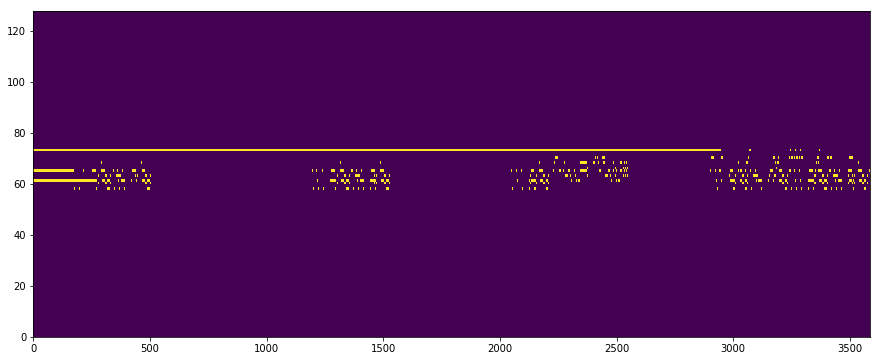

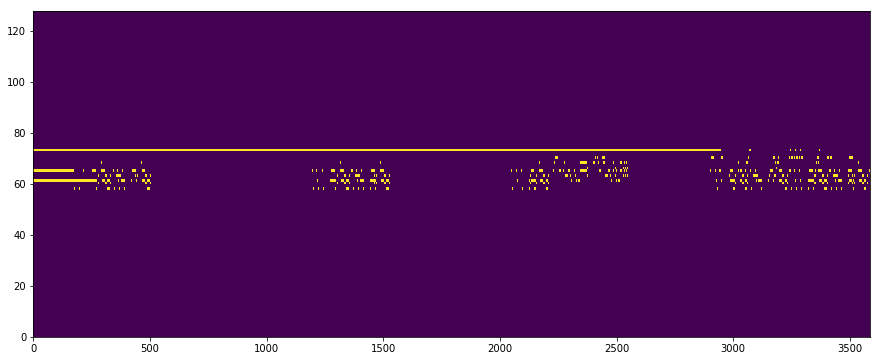

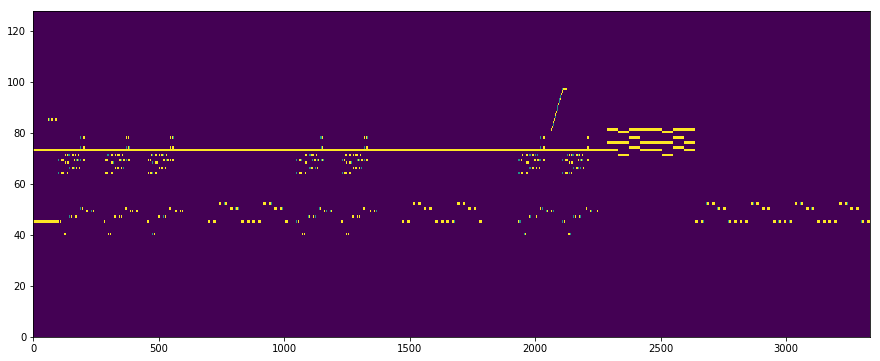

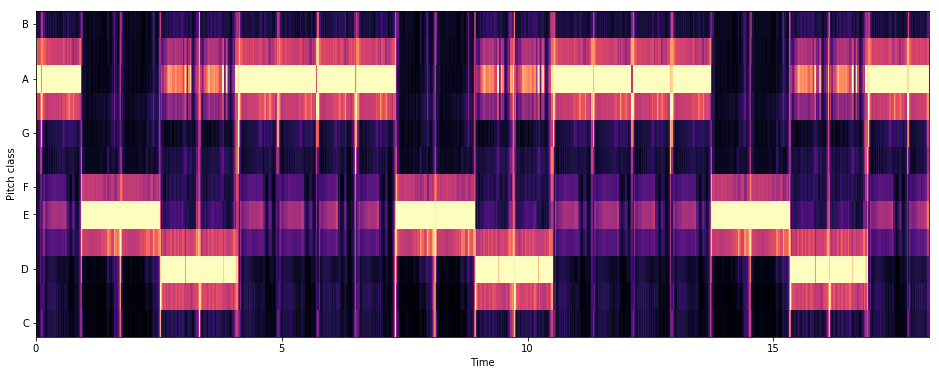

500


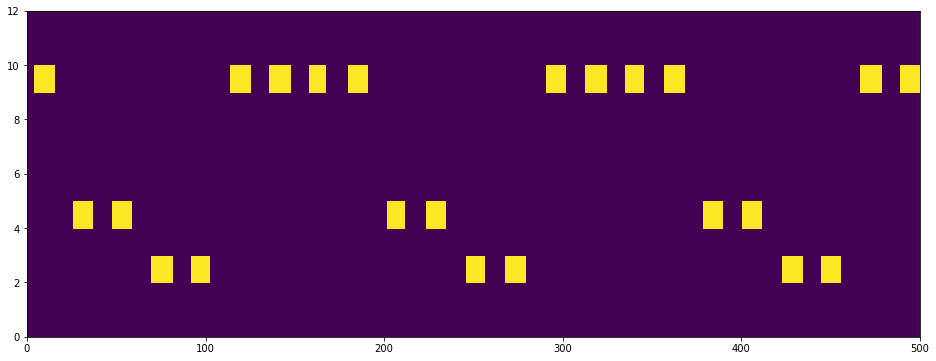

In [347]:



# import mir_eval,util_midi
Xs = chunks
Ys = mroll_ext
truncate = -500
print Xs.shape,Ys.shape

if truncate > 0:
    Xs = Xs[:truncate + 1]
    Ys = Ys[:truncate + 1]
elif truncate < 0:
    Xs = Xs[truncate:]
    Ys = Ys[truncate:]

# Ys = util_midi.mroll2chroma(Ys)

cXs = np.concatenate(Xs,axis = 0)
cYs = util_midi.midi_roll_play(Ys)

offset = 1
plt.figure(figsize = [16,6])
p.xs = cXs[:-offset]
q1 = cqt(p)


plt.figure(figsize = [16,6])
p.xs = cYs[offset:]
# q2 = cqt(p)
ccYs = mroll2chroma(Ys[:N],norm = 0) > 0
print N
q2 = ccYs 
plt.pcolormesh(q2.T,)
plt.show()


In [185]:
import random
%timeit random.choice([62,63,64])
for i in range(10):
    print random.choice([62,63,64])

The slowest run took 8.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 565 ns per loop
64
64
63
63
62
62
64
63
62
62


In [183]:
%timeit np.random.choice([62,63,64])

The slowest run took 16.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.68 µs per loop


In [13]:
# from util_midi import persistent
import random
def clean_this_shit(mid,DEBUG = 0,rand_inst = [62,63,64],pitch_shift = 0,pitch_center = 0,ini_offset = 100):
    keep = [
#         'time_signature',
        'track_name','end_of_track','note_on','note_off']
    notes = ['note_on','note_off']
    tracks = []
    newmid = mido.MidiFile(type = 1)
    TEMPO = None
    TSig = None
#     SMPTE = None 
#    SMPTE = mido.MetaMessage(type = 'smpte_offset',frame_rate=25,hours=0,minutes=0,seconds=0,frames=1,sub_frames=0,time=0)
    SMPTE = mido.MetaMessage(type = 'smpte_offset',frame_rate=25,hours=0,minutes=0,seconds=0,frames=0,sub_frames=0,time=0)
    for (i,track) in enumerate(mid.tracks):
        COUNT = 0
        INST  = None
        Didx = []
        newtrack = mido.MidiTrack()
        META = 0
#         CHANNEL = None
        for (i,msg) in enumerate(track):
            if msg.type in keep:
                if msg.type in notes:
                    COUNT += 1
                    if pitch_center:
                        msg.note = 2 * pitch_center - msg.note
                    msg.note = msg.note + pitch_shift
                    if msg.velocity != 0:
                        msg.velocity = 64
#                     assert INST is not None,' INST is None \n %s' %msg
#                     CHANNEL = INST.channel
#                     assert isinstance(INST.channel,int),"CHANNEL is %s" % CHANNEL
                    msg.channel  = INST.channel
                    if COUNT == 1:
                        msg.time = msg.time + ini_offset

                newtrack.append(msg)
            else:
                if TSig is None:
                    if msg.type =='time_signature':
                        TSig = msg
                        newtrack.append(msg)
                if TEMPO is None:
                    if msg.type =="set_tempo":                                
                        TEMPO=msg.tempo                
                        newtrack.append(msg)
                        newtrack.append(SMPTE)
                        META = 1
                if INST is None:
                    if msg.type =='program_change':
    #                     INST = msg.program
                        INST = msg
                        if rand_inst:
                            INST.program = random.choice(rand_inst)-1
#                         if CHANNEL is None:
#                             CHANNEL = msg.channel
                        newtrack.append(msg)

        if DEBUG:
            print len(newtrack)
        if (not META) & (COUNT==0):   #### trackname, inst, end
#         if (newtrack[0].type =='track_name') and (newtrack[-1].type =='end_of_track'):
            #### discard this track
            pass
        else:
            tracks.append(newtrack[:])
    newmid.tracks = tracks
    if DEBUG:
        print newmid
    assert len(newmid.tracks) != 0, "No tracks left after cleaning"
    return newmid
# mid
print mid
import copy
clean_this_shit(copy.copy(mid)).print_tracks()
                # get_tempo(mid).print_tracks()

NameError: name 'mid' is not defined

In [3]:
import mido
def single_tempo(mid,as_message= 0,DEBUG = 0):
    TEMPO = None
    for track in mid.tracks:
        Didx = []
        for (i,msg) in enumerate(track):    
            if msg.type =="set_tempo":                
                if TEMPO is None:
                    TEMPO=msg if as_message else msg.tempo                
                else:
                    Didx.append(i)
#                 print msg
#                 return TEMPO
            elif msg.type in ['smpte_offset','control_change']:
                Didx.append(i)
            
            elif msg.time != 0:
                break
        for x in Didx[::-1]:
            _ = track.pop(x )
            if DEBUG:
                print _
    if TEMPO is None:
        raise Exception("Cannot find tempo for %s" % mid)
    return (mid)
def filter_on_INST(mid, permit = None,DEBUG=0, default_INST = 43):
    if permit is None:
        permit = persistent
        
    Didx = []
    for (i,track) in enumerate(mid.tracks):
        metaEND = None
        INST = None
        CHANNEL = None
        for (j,msg) in enumerate(track):
            if metaEND is None:
                if msg.type in ['note_on','note_off','program_change']:
                    metaEND = j
#             else:
                    if CHANNEL is None:                    
#                         if hasattr(msg,"channel"):
                        CHANNEL = msg.channel
            if msg.type =="program_change":
                INST = (msg.program + 1)
                if INST not in permit:
                    Didx.append(i)
                    break
        ##### Set program to default
        if INST is None and metaEND is not None and CHANNEL is not None:
            msg = mido.Message(type='program_change',channel = CHANNEL , program = default_INST - 1, time = 0)            
            track.insert(metaEND,msg)
            mid.tracks[i] = track
    for x in Didx[::-1]:
        _ = mid.tracks.pop(x)
        if DEBUG:
            print _        
    return mid
def clean(mid):

    for (i,track) in enumerate(mid.tracks):
        Didx = []
        for (j,msg) in enumerate(track):    
            if msg.type =="smtpe":
                if TEMPO is None:
                    TEMPO=msg if as_message else msg.tempo                
                else:
                    Didx.append(i)
#                 print msg
#                 return TEMPO
            elif msg.time != 0:
                break
        for x in Didx[::-1]:
            _ = track.pop(x )
            if DEBUG:
                print _

# mid
import multiprocessing as mp
def mp_map(f,lst,n_cpu,**kwargs):
    if n_cpu >1:
        p = mp.Pool(n_cpu)
        OUTPUT=p.map(f,lst)
        p.close()
    else:
        OUTPUT = map(f,lst)
    return OUTPUT

import numpy as np
def check_midi(fname,**kwargs):
    assert fname.endswith('mid'), "Must pass a '.mid' file"

    mroll = util_midi.extract_midi_roll(fname, DEBUG=0,**kwargs)
#         SUM = mroll.sum(axis = 1,keepdims = 1)
#         SUM[SUM==0]=1
#         mroll = mroll/SUM
    if mroll is None:
        raise Exception("mroll is None")
    else:
        assert mroll.shape[-1]==128,"make sure mroll is coded in midi"
        
    bname = fname.rsplit('.',1)[0]
#     tim_buffer = timidify(fname)
    tim_buffer = fluidify(fname)
    mroll = np.array(mroll)
    np.save('%s.mroll' % bname, mroll)
    return 1

# 3447570/16000.
def soxify(fname,sr = 16000):
#     tempname = '%s.mid'%fname
#     _ = !cp {fname} {tempname}
    outname = '%s.wav' % fname.rsplit('.',1)[0]
    res = !sox -t raw -r {sr} -e signed -b 16 -c 1 {fname} {outname} 
#     !rm {tempname}
    return res
# soxify(mid.filename)
def fluidify(fname,sr = 16000,
                SFfile = '/usr/share/sounds/sf2/FluidR3_GM.sf2'):
    outname = '%s.wav' % fname.rsplit('.',1)[0]
    res = !fluidsynth -r {sr} -F {outname} {SFfile} {fname} 
    assert not res.grep('No preset found on*'), "MIDI contains missing preset"
#     res = !fluidsynth {fname}
    return res
# fluidify(mid.filename)
def timidify(fname, sr = 16000):
    OUT = !timidity  -Ow -s {sr} {fname}
    assert not OUT.grep('No instrument mapped to*'), "MIDI file not recognised"
    return OUT

In [38]:
msg = mid.tracks[3][1]
# msg.is_realtime
msg
new_msg = mido.Message(type='program_change',channel = 0, program = 41,time = 0)
new_msg == msg
print msg
print new_msg

program_change channel=0 program=41 time=0
program_change channel=0 program=41 time=0


In [187]:
# print mid
from util_midi import *
filename = 'sample/MIDI/jsbach/bwv0541f.mid'
filename = 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04.mid'
bname = filename.rstrip('.mid')
sample_dt = 0.05
DEBUG = 1

if 1:
    mid = mido.MidiFile(filename)
print mid
mid.print_tracks()
filter_on_INST(mid)
# clean_this_shit(mid)

<midi file 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04.mid' type 1, 9 tracks, 738 messages>
=== Track 0
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message set_tempo tempo=1428571 time=0>
<meta message smpte_offset frame_rate=25 hours=0 minutes=0 seconds=0 frames=0 sub_frames=93 time=0>
<meta message end_of_track time=0>
=== Track 1
<meta message track_name name=u'(C) & (P) 1993' time=0>
<meta message end_of_track time=127>
=== Track 2
<meta message track_name name=u'CCARH,Stanford' time=0>
<meta message end_of_track time=0>
=== Track 3
<meta message track_name name=u'Violino I' time=0>
<message program_change channel=0 program=41 time=0>
<message note_on channel=0 note=67 velocity=88 time=0>
<message note_off channel=0 note=67 velocity=0 time=945>
<message note_on channel=0 note=68 velocity=88 time=15>
<message note_off channel=0 note=68 velocity=0 time=470>
<mess

<midi file 'sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04.mid' type 1, 8 tracks, 489 messages>

In [150]:
# fname = 'sample/MIDI/midiworld/646.mid'
fname = 'sample/MIDI/midiworld/430.mid'
mid = mido.MidiFile(fname)
mid = filter_on_INST(mid)
mid = clean_this_shit(mid)
for t in mid.tracks:
    print  time_track(t)
for t in mid.tracks:
    print '\n'.join(str(x) for x in t[:5])
    print '.......'
    print '\n'.join(str(x) for x in t[-2:])

clean_this_shit(mid)

181396
181248
178048
181248
181248
181248
181248
<meta message set_tempo tempo=500000 time=0>
<meta message smpte_offset frame_rate=25 hours=0 minutes=0 seconds=0 frames=1 sub_frames=0 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message end_of_track time=181396>
.......
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message end_of_track time=181396>
<meta message track_name name=u'Bop!' time=0>
program_change channel=2 program=63 time=0
note_on channel=2 note=61 velocity=64 time=1920
note_on channel=2 note=70 velocity=64 time=0
note_on channel=2 note=65 velocity=64 time=0
.......
note_off channel=2 note=70 velocity=64 time=6
<meta message end_of_track time=26415>
<meta message track_name name=u'EnVogue' time=0>
program_change channel=3 program=73 time=0
note_on channel=3 note=61 velocity=64 time=6720
note_on channel=3 note=58 velocit

<midi file None type 1, 7 tracks, 13918 messages>

In [148]:
??mid.length

In [149]:
for track in mid.tracks:
#     print time_track(track) - track[-1].time
    print time_track(track)
print 181248 / mid.length * 188

181396
181248
178048
181248
181248
181248
181248
180332.747359


In [189]:
# def func(fname):
# #     try:
#     if 1:
#         mid =  mido.MidiFile(fname)
# #         mid =  single_tempo(mid)
#         mid =  clean_this_shit(mid)
#         mid =  filter_on_INST(mid,DEBUG)
# #         if mid.tracks:
# #             mid = filter_on_INST(mid,DEBUG = 1)
# #         print mid
#         newname = fname.rstrip('.mid') + '.single_mid'
#         print newname
#         mid.save(newname)
#         return 1
# #     except Exception as e:
# #         raise Exception(e)
##         print e
##         return 0
func('sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-02.mid')

sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-02.single_mid


1

In [284]:
'%s'%(-1)

'-1'

In [4]:
# suc = map(midi_feed,FILES)
# from util_midi import 
import functools,os
DIRs = [
    'sample/MIDI/',
#         'sample/MIDI/midiworld/',
#         'sample/MIDI/jsbach/'
       ]
# func = functools.partial(midi_feed,norm = 1)
# func = functools.partial(midi_feed,norm = 0)
# func = check_midi

def func_DIR_mid2single(fname,**kwargs):
    try:
        pitch_shift = kwargs.get('pitch_shift',0)
        pitch_center= kwargs.get('pitch_center',0)
        mid =  mido.MidiFile(fname)
#         mid =  single_tempo(mid,DEBUG = 0)
        mid = filter_on_INST(mid)
        mid = clean_this_shit(mid,**kwargs)
#         if mid.tracks is []:
#             return 0
#         if mid.tracks:
#             mid = filter_on_INST(mid,DEBUG = 1)
#         print mid
        newname = fname.rstrip('.mid') + 'P%sS%s.single_mid'%(pitch_shift,pitch_center)
        print newname
        mid.save(newname)
        return 1
    except Exception as e:
        print '%s\n%s' %(e , fname)
        return 0
def DIR_mid2single(DIR, cap = 50,para = 12,clean = 1,**kwargs):       
    FILES0 = list(os.walk(DIR))[0][-1]
    FILES0 = [os.path.join(DIR,f) for f in FILES0]
#     for f in FILEs:
#         os.remove(f)
    if clean:
        for f in FILES0:
            if f.endswith('.single_mid'):
                if os.path.isfile(f):
    #         fname = f+'.single_mid'
                    os.remove(f)
    #### scan all midi
    FILES = [f.rstrip('.mid') for f in FILES0 if f.endswith(".mid")]
    FILES = [f+'.mid' for f in FILES]
    FILES = FILES[:cap]
    func = functools.partial(func_DIR_mid2single,**kwargs)
    suc = mp_map(func,FILES,para)
#     suc = mp_map(func,FILES,1)    
    print "All:",len(suc)
    print "skipped:",sum(1 for x in suc if x is None)
    print "success:",sum(x for x in suc if x is not None)
    print "Done"
# spwave.read(fname)
for DIR in DIRs:
    DIR_mid2single(DIR,cap = 500, para = 12)


sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-02P0S0.single_mid
attribute must be in range 0..99
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-06.mid
attribute must be in range 0..99
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-05.mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04P0S0.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/test.mid
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-03P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-03P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre

In [28]:
!du -sh sample/MIDI/jsbach.aug/
# 

7.1G	sample/MIDI/jsbach.aug/


In [26]:
!mkdir -p sample/MIDI/jsbach.aug/
!mv sample/MIDI/jsbach/*.npy 'sample/MIDI/jsbach.aug/'

In [22]:
#  print "hi"
!rm sample/MIDI/jsbach/*.wav

In [14]:
pC = 0
pS = 0
DIR = 'sample/MIDI/jsbach/'
DIR_mid2single(DIR,cap = 500, para = 7,rand_inst=[63]
                       ,pitch_center = pC
                       ,pitch_shift = pS
                       ,clean = 1)

[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv635g.mid'
sample/MIDI/jsbach/bwv635g.mid[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv619g.mid'
sample/MIDI/jsbach/bwv619g.midMThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv644sc.mid


MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv642sc.mid
sample/MIDI/jsbach/bwv639scP0S0.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv632sc.mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv641sc.mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv631sc.mid
sample/MIDI/jsbach/bwv530-3P0S0.single_mid
sample/MIDI/jsbach/bwv552fP0S0.single_mid
sample/MIDI/jsbach/bwv539_2P0S0.single_mid
sample/MIDI/jsbach/bwv0541pP0S0.single_mid
sample/MIDI/jsbach/bwv686P0S0.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv619sc.mid
sample/MIDI/jsbach/bwv572P0S0.single_mid
sample/MIDI/jsbach/bwv525-1P0S0.single_mid
sample/MIDI/jsbach/bw

In [16]:
# DIR_mid2single(DIR)
DIR = 'sample/MIDI/jsbach/'

# pS_range = range(-4,-0,2)
# pS_range = range(-8,-4,2)
# pS_range = range(0,6,2)
pS_range = range(8,14,2)

for pS in pS_range:
    for pC in [0,60]:
        DIR_mid2single(DIR,cap = 500, para = 7,rand_inst=[63]
                       ,pitch_center = pC
                       ,pitch_shift = pS
                       ,clean = 0)
    
DIR_single2mroll(DIR,cap = 500,para = 7)
DIR_mroll2both(DIR,cap = 500,para = 7)

[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv635g.mid'
sample/MIDI/jsbach/bwv635g.midMThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv644sc.mid[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv619g.mid'
sample/MIDI/jsbach/bwv619g.mid


MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv642sc.mid
sample/MIDI/jsbach/bwv639scP8S0.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv632sc.mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv641sc.mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv631sc.mid
sample/MIDI/jsbach/bwv530-3P8S0.single_mid
sample/MIDI/jsbach/bwv552fP8S0.single_mid
sample/MIDI/jsbach/bwv539_2P8S0.single_mid
sample/MIDI/jsbach/bwv572P8S0.single_mid
sample/MIDI/jsbach/bwv686P8S0.single_mid
sample/MIDI/jsbach/bwv0541pP8S0.single_mid
sample/MIDI/jsbach/jsbwv541P8S0.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv619sc.mid
[Errno 2] No such fil

sample/MIDI/jsbach/bwv529-3P10S0.single_mid
sample/MIDI/jsbach/bwv640scP10S0.single_mid
sample/MIDI/jsbach/bwv539_1P10S0.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv637sc.mid[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv634g.mid'
sample/MIDI/jsbach/bwv634g.mid

MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv638sc.mid
[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv633g.mid'
sample/MIDI/jsbach/bwv633g.mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv643sc.mid
sample/MIDI/jsbach/jsbwv552P10S0.single_mid
sample/MIDI/jsbach/jsbwv543P10S0.single_mid
sample/MIDI/jsbach/jsbwv532P10S0.single_mid
sample/MIDI/jsbach/jsbwv533P10S0.single_mid
sample/MIDI/jsbach/bwv530-1P10S0.single_mid
sample/MIDI/jsbach/bwv0541fP10S0.single_mid
sample/MIDI/jsbach/bwv653P10S0.single_mid
sample/MIDI/jsbach/bwv552pP10S0.single_mid
sample/MIDI/jsbach/bwv537P10S0.single_mid
All: 52
skipped: 0
success: 32
Done
[Errno 2] No such fi

sample/MIDI/jsbach/bwv632g.mid
sample/MIDI/jsbach/bwv525-1P12S60.single_mid
sample/MIDI/jsbach/bwv582P12S60.single_mid
sample/MIDI/jsbach/bwv525-3P12S60.single_mid
sample/MIDI/jsbach/bwv733P12S60.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv634sc.mid
sample/MIDI/jsbach/jsbwv549P12S60.single_mid
sample/MIDI/jsbach/bwv630scP12S60.single_mid
[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv630g.mid'
sample/MIDI/jsbach/bwv630g.mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv633sc.mid
sample/MIDI/jsbach/bwv529-1P12S60.single_mid
sample/MIDI/jsbach/bwv530-2P12S60.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv635sc.mid
sample/MIDI/jsbach/bwv588P12S60.single_mid
sample/MIDI/jsbach/bwv529-2P12S60.single_mid
MThd not found. Probably not a MIDI file
sample/MIDI/jsbach/bwv636sc.mid
[Errno 2] No such file or directory: 'sample/MIDI/jsbach/bwv636g.mid'
sample/MIDI/jsbach/bwv636g.mid
sample/MIDI/jsbach/bwv539_1P12S

sample/MIDI/jsbach/bwv539_2P8S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'Fugue in d minor' time=0>
sample/MIDI/jsbach/bwv639scP10S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'Ich Ruf zu Dir, Herr Jesu Christ - bwv 639' time=0>
sample/MIDI/jsbach/bwv539_1P12S60.single_mid
sample/MIDI/jsbach/jsbwv541P10S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'Prelude in d minor' time=0>
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
sample/MIDI/jsbach/bwv653P8S60.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
mroll is None
sample/MIDI/jsbach/bwv640scP12S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'In Dich Hab Ich Gehoffet, Herr - BWV 640 ' time=0>
sample/MIDI/jsbach/bwv529-2P12S60.single_mid
[WARN]:No notes were detected

[WARN]:No notes were detected in <meta message time_signature numerator=1 denominator=8 clocks_per_click=12 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv529-3P4S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=2 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv640scP8S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'In Dich Hab Ich Gehoffet, Herr - BWV 640 ' time=0>
sample/MIDI/jsbach/bwv0541fP4S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/jsbwv541P4S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
sample/MIDI/jsbach/bwv529-1P12S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
s

[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv552fP4S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=2 clocks_per_click=48 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv539_2P8S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'Fugue in d minor' time=0>
sample/MIDI/jsbach/jsbwv541P4S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
sample/MIDI/jsbach/jsbwv549P8S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
sample/MIDI/jsbach/bwv530-3P0S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv537P10S60.single_mid
[WARN]:No notes were detected in <meta message 

sample/MIDI/jsbach/bwv588P0S60.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/jsbwv543P12S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
sample/MIDI/jsbach/jsbwv543P4S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
450944 requested and 502 written
sample/MIDI/jsbach/bwv529-3P2S60.single_mid
516992 requested and 502 written
sample/MIDI/jsbach/bwv686P0S60.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=2 clocks_per_click=48 notated_32nd_notes_per_beat=8 time=0>
mroll is None
sample/MIDI/jsbach/jsbwv541P2S60.single_mid
941056 requested and 502 written
sample/MIDI/jsbach/jsbwv543P2S60.single_mid
415360 requested and 502 written
sample/MIDI/jsbach/jsbwv549P10S0.single_mid
[WARN]:No notes were detected in <meta message 

187392 requested and 502 written
318592 requested and 502 written
sample/MIDI/jsbach/bwv552pP10S0.single_mid
sample/MIDI/jsbach/bwv539P12S60.single_mid
142976 requested and 502 written
sample/MIDI/jsbach/bwv525-3P8S60.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
[WARN]:No notes were detected in <meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
136192 requested and 113142 written
sample/MIDI/jsbach/bwv525-1P8S60.single_mid
319104 requested and 502 written
sample/MIDI/jsbach/jsbwv549P2S0.single_mid
425344 requested and 502 written
sample/MIDI/jsbach/bwv537P4S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
[WARN]:No notes were

sample/MIDI/jsbach/bwv0541pP0S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv537P8S60.single_mid
[WARN]:No notes were detected in <meta message set_tempo tempo=500000 time=0>
425344 requested and 502 written
sample/MIDI/jsbach/bwv552pP8S0.single_mid
814592 requested and 502 written
sample/MIDI/jsbach/bwv525-2P12S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=1 denominator=8 clocks_per_click=12 notated_32nd_notes_per_beat=8 time=0>
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv525-3P4S60.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=3 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
629760 requested and 502 written
sample/MIDI/jsbach/bwv65

[WARN]:No notes were detected in <meta message track_name name=u'Ich Ruf zu Dir, Herr Jesu Christ - bwv 639' time=0>
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
sample/MIDI/jsbach/bwv572P8S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'Fantasia in G major, BWV 572, by J.S. Bach' time=0>
sample/MIDI/jsbach/bwv582P0S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
319104 requested and 129014 written
sample/MIDI/jsbach/bwv530-3P0S60.single_mid
327296 requested and 502 written
sample/MIDI/jsbach/bwv639scP8S60.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'Ich 

[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
502656 requested and 502 written
sample/MIDI/jsbach/bwv686P10S60.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=2 clocks_per_click=48 notated_32nd_notes_per_beat=8 time=0>
mroll is None
sample/MIDI/jsbach/bwv530-1P12S0.single_mid
535040 requested and 502 written
sample/MIDI/jsbach/bwv530-2P0S0.single_mid
[WARN]:No notes were detected in <meta message time_signature numerator=2 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
[WARN]:No notes were detected in <meta message time_signature numerator=1 denominator=8 clocks_per_click=12 notated_32nd_notes_per_beat=8 time=0>
276608 requested and 502 written
187392 requested and 502 written
sample/MIDI/jsbach/bwv525-1P4S0.single_mid
318592 requested and 502 written
sample/MIDI/jsbach/bwv525-3P8S0.single_mid
sample/MIDI/jsbach/bw

 sample/MIDI/jsbach/jsbwv552P12S0.mroll.npy
cannot reshape array of size 302070 into shape (2557,128) 
 sample/MIDI/jsbach/bwv525-3P8S0.mroll.npy
2495
(2493, 128) (2494, 800)
Failed to interpret file 'sample/MIDI/jsbach/jsbwv549P10S0.mroll.npy' as a pickle 
 sample/MIDI/jsbach/jsbwv549P10S0.mroll.npy
9591
(9589, 128) (9590, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv525-2P8S0.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv525-2P8S0.mroll.npy
1066
(1064, 128) (1065, 800)
3237
(3235, 128) (3236, 800)
3237
(3235, 128) (3236, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv0541fP2S60.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv0541fP2S60.mroll.npy
709
(706, 128) (708, 800)
Shape of .mroll.npy and .wav does not match: (706, 128) (708, 800) 
 sample/MIDI/jsbach/bwv639scP4S60.mroll.npy
2926
(2924, 128) (2925, 800)
3659
(3657, 128) (3658, 800)
567
(564, 128) (566, 800)
Shape of .mroll.npy and .wav does not match: (564, 128) (566, 800) 
 sample/MIDI/jsbach/bwv640scP8S0.mroll.n

 sample/MIDI/jsbach/bwv539P12S60.mroll.npy
1119
(1117, 128) (1118, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv525-2P2S60.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv525-2P2S60.mroll.npy
Failed to interpret file 'sample/MIDI/jsbach/bwv0541pP8S0.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv0541pP8S0.mroll.npy
3275
(3273, 128) (3274, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv0541fP12S60.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv0541fP12S60.mroll.npy
1119
(1117, 128) (1118, 800)
2491
(2489, 128) (2490, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv529-1P10S0.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv529-1P10S0.mroll.npy
6367
(6364, 128) (6366, 800)
Shape of .mroll.npy and .wav does not match: (6364, 128) (6366, 800) 
 sample/MIDI/jsbach/jsbwv543P2S0.mroll.npy
3237
(3235, 128) (3236, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv0541fP8S0.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv0541fP8S0.mroll.npy
Failed to interpret file 'sample/MIDI

 sample/MIDI/jsbach/bwv0541pP0S60.mroll.npy
Failed to interpret file 'sample/MIDI/jsbach/bwv530-1P12S60.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv530-1P12S60.mroll.npy
2495
(2493, 128) (2494, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv552pP12S60.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv552pP12S60.mroll.npy
2491
(2489, 128) (2490, 800)
2563
(2561, 128) (2562, 800)
2491
(2489, 128) (2490, 800)
2563
(2561, 128) (2562, 800)
1119
(1117, 128) (1118, 800)
File format ''... not understood. 
 sample/MIDI/jsbach/bwv588P12S0.mroll.npy
709
(706, 128) (708, 800)
Shape of .mroll.npy and .wav does not match: (706, 128) (708, 800) 
 sample/MIDI/jsbach/bwv639scP0S60.mroll.npy
1466
(1464, 128) (1465, 800)
7354
2491
(2489, 128) (2490, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv0541fP8S60.mroll.npy' as a pickle 
 sample/MIDI/jsbach/bwv0541fP8S60.mroll.npy
(7352, 128) (7353, 800)
Failed to interpret file 'sample/MIDI/jsbach/bwv552pP2S60.mroll.npy' as a pickle 
 sample/MIDI/js

In [16]:
# DIR_mid2single(DIR)
DIR = 'sample/MIDI'
DIR_mid2single(DIR,cap = 50, para = 7,rand_inst=1)
DIR_single2mroll(DIR,para = 7)
DIR_mroll2both(DIR,para = 7,offset = 0)

MThd not found. Probably not a MIDI file
sample/MIDI/test.midattribute must be in range 0..99
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-06.mid

sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-02P0S0.single_mid
attribute must be in range 0..99
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-05.mid
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-03P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-03P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre

In [41]:
import sys
reload(sys.modules['util_midi'])
import util_midi
# from util_midi import *

In [44]:
# DIR_mid2single(DIR)
# DIR = 'sample/MIDI/jsbach/'
DIR = 'sample/MIDI/'
DIR_mid2single(DIR,cap = 50, para = 7,rand_inst=1,
              clean = 1,ini_offset = 0
              )
DIR_single2mroll(DIR,para = 7)
DIR_mroll2both(DIR,para = 7,offset = 0,truncate = 0)

MThd not found. Probably not a MIDI file
sample/MIDI/test.mid
attribute must be in range 0..99
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-06.mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-02P0S0.single_mid
attribute must be in range 0..99
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-05.mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-03P0S0.single_mid
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-04P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre

In [25]:
# DIR_mid2single(DIR)
DIR = 'sample/MIDI/midiworld'
DIR_mid2single(DIR,cap = 50, para = 7,rand_inst=1)
DIR_single2mroll(DIR,para = 7)
DIR_mroll2both(DIR,para = 7,offset = 0)

sample/MIDI/midiworld/807P0S0.single_mid
sample/MIDI/midiworld/404P0S0.single_mid
sample/MIDI/midiworld/120P0S0.single_mid
sample/MIDI/midiworld/210P0S0.single_mid
No tracks left after cleaning
sample/MIDI/midiworld/753.mid
sample/MIDI/midiworld/526P0S0.single_mid
No tracks left after cleaning
sample/MIDI/midiworld/71.mid
sample/MIDI/midiworld/605P0S0.single_mid
No tracks left after cleaning
sample/MIDI/midiworld/510.mid
sample/MIDI/midiworld/603P0S0.single_mid
sample/MIDI/midiworld/570P0S0.single_mid
sample/MIDI/midiworld/541P0S0.single_mid
sample/MIDI/midiworld/707P0S0.single_mid
sample/MIDI/midiworld/516P0S0.single_mid
No tracks left after cleaning
sample/MIDI/midiworld/575.mid
sample/MIDI/midiworld/542P0S0.single_mid
sample/MIDI/midiworld/72P0S0.single_mid
sample/MIDI/midiworld/473P0S0.single_mid
sample/MIDI/midiworld/899P0S0.single_mid
No tracks left after cleaning
sample/MIDI/midiworld/964.mid
No tracks left after cleaning
sample/MIDI/midiworld/96.mid
sample/MIDI/midiworld/975P0S

sample/MIDI/midiworld/166P0S0.single_mid
[WARN]:No notes were detected in <meta message set_tempo tempo=476190 time=0>
mroll is None
sample/MIDI/midiworld/526P0S0.single_mid
[WARN]:No notes were detected in <meta message set_tempo tempo=294117 time=0>
All: 40
skipped: 0
success: 31
Done
775
(775, 128) (774, 800)
1223
(1223, 128) (1222, 800)
1196
649
1615
(649, 128) (648, 800)
(1196, 128) (1195, 800)
(1615, 128) (1614, 800)
2664
2997
708
(708, 128) (707, 800)
(2663, 128) (2663, 800)
(2996, 128) (2996, 800)
4630
1346
4552
(1345, 128) (1345, 800)
1620
3314
(1619, 128) (1619, 800)
3546
(4630, 128) (4629, 800)
(4552, 128) (4551, 800)
2027
(3314, 128) (3313, 800)
(3546, 128) (3545, 800)
(2026, 128) (2026, 800)
3339
583
(3339, 128) (3338, 800)
(582, 128) (582, 800)
1260
664
(664, 128) (663, 800)
(1260, 128) (1259, 800)
2991
(2991, 128) (2990, 800)
4206
1718
3754
(1717, 128) (1717, 800)
(4206, 128) (4205, 800)
(3753, 128) (3753, 800)
3720
(3720, 128) (3719, 800)
1062
4616
827
6210
(1062, 128) 

In [216]:
alias = 't16'
!ls Models/sgd_{alias}* -tl

-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 22:30 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-01-0.02.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 22:30 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-01-0.03.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 22:22 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-02-0.05.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 22:22 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-01-0.00.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 22:18 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-02-0.02.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 22:08 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-02-0.00.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 21:28 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-15-0.23.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336 Dec 11 21:27 Models/sgd_t16_lr_0Dot01-momentum_0Dot75-decay_0Dot0-14-0.22.hdf5
-rw-rw-r-- 1 shouldsee shouldsee 1277336

In [193]:
%%bash
# ls -lt sample/MIDI/*.single_mid
# ls -lt sample/MIDI/*/*.single_mid
ls -lt sample/MIDI/*.wav
# ls -lt sample/MIDI/*/*.single_mid
ls -lt sample/MIDI/*.mroll.npy
# ls -lt sample/MIDI/*/*.mroll.npy
# ls -lt sample/MIDI/midiworld/*.mroll.npy


-rw-r--r-- 1 shouldsee shouldsee 21534120 Dec 10 19:17 sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01.wav
-rw-r--r-- 1 shouldsee shouldsee 23425936 Dec 10 19:17 sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-03.wav
-rw-r--r-- 1 shouldsee shouldsee 32927464 Dec 10 19:17 sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-01.wav
-rw-r--r-- 1 shouldsee shouldsee 15202308 Dec 10 19:17 sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-01.wav
-rw-r--r-- 1 shouldsee shouldsee 12346484 Dec 10 19:17 sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-03.wav
-rw-r--r-- 1 shouldsee shouldsee 10911052 Dec 10 19:17 sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-02.wav
-rw-r--r-- 1 shouldsee shouldsee  6707168 Dec 10 19:17 sample/MIDI/composer-bach-edition-bg-g

In [ ]:
# %

In [139]:
# check_midi(baFILES[0])

[WARN]:No notes were detected in <meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>


1

In [27]:
for DIR in DIRs:
    !rm {DIR}/*single_.*

In [5]:
%%time
import os,util_midi

# suc = map(midi_feed,FILES)
DIRs = [
        'sample/MIDI/',
#         'sample/MIDI/midiworld/',
#         'sample/MIDI/jsbach/'
       ]
# func = functools.partial(midi_feed,norm = 1)
# func = functools.partial(midi_feed,norm = 0)
# func = check_midi
def func_DIR_single2mroll(fname):
    try:
        print fname
        check_midi(fname,THRESHOLD = 0.1)
        return 1
    except Exception as e:
        print e
        return 0
        
def DIR_single2mroll(DIR,cap = 50, para = 12):
    FILES0 = list(os.walk(DIR))[0][-1]
    FILES0 = [os.path.join(DIR,f) for f in FILES0]
#     for f in FILEs:
#         os.remove(f)
    for f in FILES0:
        if f.endswith('.mroll.npy'):
            os.remove(f)
#         assert isinstance(f,str),f
#         fname = f+'.mroll.npy'
#         if os.path.isfile(fname):
#             os.remove(fname)
    #### scan all midi
    FILES = [f.rsplit('.',1)[0] for f in FILES0 if f.endswith(".single_mid")]
    #### recompute mroll
#     FILES = [os.path.join(DIR,f.rstrip('.mroll.npy')+'.mid') for f in FILES0 if f.endswith(".mroll.npy")]
#     FILES = [os.path.join(DIR,f.rstrip('.mroll.npy')) for f in FILES0 if f.endswith(".mroll.npy")]

    FILES = [f+'.single_mid' for f in FILES]
    FILES = FILES[:cap]
#     print FILES[0]
#     break
    suc = mp_map( func_DIR_single2mroll,FILES,para)
#     suc = mp_map(func,FILES,1)    
    print "All:",len(suc)
    print "skipped:",sum(1 for x in suc if x is None)
    print "success:",sum(x for x in suc if x is not None)
    print "Done"
# spwave.read(fname)
for DIR in DIRs:
    DIR_single2mroll(DIR,cap = 100, para = 7)

sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-01P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-03P0S0.single_mid
sample/MIDI/composer-mozart-edition-bh-genre-conc-work-k450-format-midi1-multi-zip-number-03P0S0.single_mid
sample/MIDI/composer-bach-edition-bg-genre-cant-work-0002-format-midi1-multi-zip-number-01P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-02P0S0.single_mid
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-03P0S0.single_mid
[WARN]:No notes were detected in <meta message track_name name=u'untitled' time=0>
max() arg is an empty sequence
mroll is None
sample/MIDI/composer-haydn-edition-bh-genre-sym-work-s-001-format-midi1-multi-zip-number-01P0S0.single_mid
[WARN]:No notes w

In [6]:
%%time
# import util_midi
# suc = map(midi_feed,FILES)
DIRs = [
#     'sample/MIDI/',
        'sample/MIDI/midiworld/',
#         'sample/MIDI/jsbach/'
       ]
def func_DIR_mroll2both(fname,offset = 2,**kwargs):
    try:
        util_midi.mroll_feed(fname,norm = 0, 
                             offset = offset,
                              DEBUG = 1, **kwargs
#                             DEBUG = 1
                            )
#         print fname
        return 1
    except Exception as e:
        print '%s \n %s'%(e,fname)
# func = functools.partial(midi_feed,norm = 1)
# func = functools.partial(midi_feed,norm = 0)
def DIR_mroll2both(DIR,cap = 50,para = 12,**kwargs):
    FILES0 = list(os.walk(DIR))[0][-1]
    FILES0 = [os.path.join(DIR,f) for f in FILES0]
    for f in FILES0:
        if f.endswith('.both.npy'):
            os.remove(f)
        
    FILES = [f for f in FILES0 if f.endswith('.mroll.npy')]
    FILES = FILES[:cap]
    func = functools.partial(func_DIR_mroll2both,**kwargs)
    suc = mp_map(func,FILES, para)
#     suc = mp_map(func,FILES,para)    
    print "All:",len(suc)
    print "skipped:",sum(1 for x in suc if x is None)
    print "success:",sum(x for x in suc if x is not None)
    print "Done"
for DIR in DIRs:
    DIR_mroll2both(DIR,cap = 500, para = 7)
# spwave.read(fname)

775
(775, 128) (774, 800)
1223
(1223, 128) (1222, 800)
2664
(2663, 128) (2663, 800)
1196
(1196, 128) (1195, 800)
649
(649, 128) (648, 800)
2997
1615
(1615, 128) (1614, 800)
(2996, 128) (2996, 800)
4552
708
(708, 128) (707, 800)
(4552, 128) (4551, 800)
1620
(1619, 128) (1619, 800)
4630
(4630, 128) (4629, 800)
1346
(1345, 128) (1345, 800)
3546
1260
(1260, 128) (1259, 800)
(3546, 128) (3545, 800)
3339
(3339, 128) (3338, 800)
664
(664, 128) (663, 800)
3314
(3314, 128) (3313, 800)
2027
(2026, 128) (2026, 800)
583
(582, 128) (582, 800)
2991
(2991, 128) (2990, 800)
3754
(3753, 128) (3753, 800)
4206
(4206, 128) (4205, 800)
1718
(1717, 128) (1717, 800)
1062
(1062, 128) (1061, 800)
827
(827, 128) (826, 800)
3720
(3720, 128) (3719, 800)
3590
(3589, 128) (3589, 800)
4616
(4615, 128) (4615, 800)
6210
(6210, 128) (6209, 800)
2839
(2839, 128) (2838, 800)
5401
(5353, 128) (5400, 800)
Shape of .mroll.npy and .wav does not match: (5353, 128) (5400, 800) 
 sample/MIDI/midiworld/183P0S0.mroll.npy
All: 31


In [28]:
# filename = ''